<a href="https://colab.research.google.com/github/jonathanfernandi/Walmart-Product-ETL/blob/main/Walmart_Product_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Engineering - Set 6<br>
Group INT-2:


1.   Jonathan Alvindo Fernandi (A207961)
2.   Kevin Maverick (A208051)



# Group Project

## 1. Library Import

### 1.1. Import required libraries

In [1]:
# Import the requests module to handle HTTP requests
import requests

In [2]:
# Import BeautifulSoup class from bs4 library to extract data from web pages
from bs4 import BeautifulSoup

In [3]:
# Import the json module to handle JSON data from web responses
import json

In [4]:
# Import the time module to provide time-related functions
import time

In [5]:
# Import the pandas library to handle data manipulation and analysis
import pandas as pd

In [6]:
# Import the re module to work with regular expressions
import re

In [7]:
# Import the NumPy library to handle numerical computations
import numpy as np

In [8]:
# Import pyplot module from Matplotlib library to create visualisations
import matplotlib.pyplot as plt

In [9]:
# Import the Seaborn library to create visually appealing and informative statistical graphics
import seaborn as sns

## 2. Data Extraction

### 2.1. Data Scraping

#### 2.1.1. Define data scraping function

In [10]:
def scrape_product_data(search_term):
  # Define headers to mimic browser behaviour and avoid blocking
  headers = {
      'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
      'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
      'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'
  }

  # Construct the URL for the search
  url = f"https://www.walmart.com/search?q={search_term}"

  # Initialise empty list to store product data
  product_data = []

  try:
    # Make request
    response = requests.get(url, headers=headers)

    # Ensure that the request was successful by raising an exception if the server responds with an error status code
    response.raise_for_status()

    # Parse HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the script containing product data
    script = soup.find('script', {'id': '__NEXT_DATA__'})

    # If script is found, process the data
    if script:
      # Parse JSON string to Python object
      json_data = json.loads(script.string)

      # Extract products from JSON
      products = json_data['props']['pageProps']['initialData']['searchResult']['itemStacks'][0]['items']

      # Process each product
      for product in products:
        try:
          # Create dictionary with product information using get() to handle missing data
          product_info = {
              'name': product.get('name', 'N/A'),
              'price': product.get('price', 'N/A'),
              'rating': product.get('averageRating', 'N/A'),
              'number_of_reviews': product.get('numberOfReviews', 'N/A'),
              'url': f"https://walmart.com{product.get('canonicalUrl', '')}"
          }

          # Add product information to product data list
          product_data.append(product_info)
        # Handle errors for individual products
        except Exception as e:
          print(f"Error processing product: {e}")
          continue

  # Handle general scraping errors
  except Exception as e:
    print(f"Error scraping data: {e}")

  # Return list of scraped products
  return product_data

In [11]:
# Search term
search_term = "laptop"

# Number of pages to scrape
number_of_pages = 3

# Initialise an empty list to store scraped products
products = []

# Scrape data
# Loop through the specified number of pages for scraping
for page in range(1, (number_of_pages + 1)):
  try:
    # Call the data scraping function to scrape data for the current page
    products_page_n = scrape_product_data(f"{search_term}&page={page}")

    # Append the scraped data from the current page to the products list
    products.extend(products_page_n)

    # Pause execution for 2 seconds to avoid overloading the server
    time.sleep(2)
  # Handle exceptions that may occur during scraping
  except Exception as e:
    # Log any errors encountered during scraping
    print(f"Error scraping products from page {page}: {e}")

## 3. Data Transformation

### 3.1. Data Preparation

#### 3.1.1. Data Structuring

##### 3.1.1.1. Convert to DataFrame

In [12]:
# Convert the list of products into a pandas DataFrame for structured data analysis
df = pd.DataFrame(products)

In [13]:
# Display the content of the DataFrame
df

,name,price,rating,number_of_reviews,url
0,Acer Chromebook 315 15.6 inch Laptop Intel Pro...,139,4.4,5909,https://walmart.com/ip/Acer-Chromebook-315-15-...
1,Restored Apple MacBook Air 13.3-inch Intel Cor...,217,3.8,867,https://walmart.com/ip/Restored-Apple-MacBook-...
2,"Auusda 15.6"" Laptop Computer Intel N95 up to 3...",338,3.8,345,https://walmart.com/ip/Auusda-15-6-Laptop-Comp...
3,"Dell Latitude 3500 15.6"" Laptop PC | Intel Cor...",268,3.6,40,https://walmart.com/ip/Restored-Dell-Latitude-...
4,Apple MacBook Air 13.3 inch Laptop - Space Gra...,649,4.7,4895,https://walmart.com/ip/Apple-MacBook-Air-13-3-...
...,...,...,...,...,...
152,MSI Summit 13.3 inch Touch 2-in-1 Windows Lapt...,799,4.8,6,https://walmart.com/ip/MSI-Summit-13-3-inch-To...
153,"Lenovo IdeaPad 3i 14""FHD Laptop, Intel Core i5...",318,4.5,197,https://walmart.com/ip/Lenovo-IdeaPad-3i-14-FH...
154,ASUS ROG Strix G16 16 inch QHD Nebula 240Hz Ga...,0,4.8,45,https://walmart.com/ip/ASUS-ROG-Strix-G16-16-i...
155,ASUS TUF F15 15.6 inch FHD 144Hz Gaming Laptop...,1100,4.8,114,https://walmart.com/ip/ASUS-TUF-F15-15-6-inch-...


In [14]:
# Display the number of rows and columns in the DataFrame

df.shape

(157, 5)

#### 3.1.2. Data Cleaning

##### 3.1.2.1. Define data cleaning function

In [15]:
def clean_data(df):
  # Remove rows where name is 'N/A'
  df = df.drop(df[df['name'] == 'N/A'].index)

  # Handle price column
  # Convert resulting values to float type and 'N/A' values to NaN
  df['price'] = pd.to_numeric(df['price'].replace('N/A', None), errors='coerce')

  # Handle rating column
  # Convert resulting values to float type and 'N/A' values to NaN
  df['rating'] = pd.to_numeric(df['rating'].replace('N/A', None), errors='coerce')

  # Handle number of reviews column
  # Convert resulting values to integer type and 'N/A' values to <NA>
  df['number_of_reviews'] = pd.to_numeric(df['number_of_reviews'].replace('N/A', None), errors='coerce').astype('Int64')

  # Reset index after removing rows
  df.reset_index(drop=True, inplace=True)

  # Return cleaned data
  return df

In [16]:
# Clean data
cleaned_df = clean_data(df)

In [17]:
# Display cleaned data
cleaned_df

,name,price,rating,number_of_reviews,url
0,Acer Chromebook 315 15.6 inch Laptop Intel Pro...,139.00,4.4,5909,https://walmart.com/ip/Acer-Chromebook-315-15-...
1,Restored Apple MacBook Air 13.3-inch Intel Cor...,217.00,3.8,867,https://walmart.com/ip/Restored-Apple-MacBook-...
2,"Auusda 15.6"" Laptop Computer Intel N95 up to 3...",338.00,3.8,345,https://walmart.com/ip/Auusda-15-6-Laptop-Comp...
3,"Dell Latitude 3500 15.6"" Laptop PC | Intel Cor...",268.00,3.6,40,https://walmart.com/ip/Restored-Dell-Latitude-...
4,Apple MacBook Air 13.3 inch Laptop - Space Gra...,649.00,4.7,4895,https://walmart.com/ip/Apple-MacBook-Air-13-3-...
...,...,...,...,...,...
145,MSI Summit 13.3 inch Touch 2-in-1 Windows Lapt...,799.00,4.8,6,https://walmart.com/ip/MSI-Summit-13-3-inch-To...
146,"Lenovo IdeaPad 3i 14""FHD Laptop, Intel Core i5...",318.00,4.5,197,https://walmart.com/ip/Lenovo-IdeaPad-3i-14-FH...
147,ASUS ROG Strix G16 16 inch QHD Nebula 240Hz Ga...,0.00,4.8,45,https://walmart.com/ip/ASUS-ROG-Strix-G16-16-i...
148,ASUS TUF F15 15.6 inch FHD 144Hz Gaming Laptop...,1100.00,4.8,114,https://walmart.com/ip/ASUS-TUF-F15-15-6-inch-...


#### 3.1.3. Data Derivation

##### 3.1.3.1. Define function to extract RAM data

In [18]:
def extract_ram_data(name):
  # Use a regular expression to find RAM details in the product name
  ram = re.findall(r'(\d+)\s*(g.?)\s(ram|ddr.|memory)', name.lower())

  # Check if any RAM data was found
  if ram:
    # Return the first matched RAM size if found
    return ram[0][0]
  # If no RAM data is found
  else:
    # Return a NaN value
    return np.nan

In [19]:
# Apply the function to extract and store RAM sizes as integers in a new DataFrame column
cleaned_df["ram"] = cleaned_df.name.apply(lambda x: extract_ram_data(x)).astype("Int64")

In [20]:
# Remove rows with missing values and resets the DataFrame index
cleaned_df = cleaned_df.dropna().reset_index(drop=True)

In [21]:
# Count the occurrences of each unique RAM size in the DataFrame
cleaned_df["ram"].value_counts()

,count
ram,
8,49
16,38
4,28
32,9
12,5
2,2
36,1
24,1


In [22]:
# Display the cleaned DataFrame
cleaned_df

,name,price,rating,number_of_reviews,url,ram
0,Acer Chromebook 315 15.6 inch Laptop Intel Pro...,139.00,4.4,5909,https://walmart.com/ip/Acer-Chromebook-315-15-...,4
1,Restored Apple MacBook Air 13.3-inch Intel Cor...,217.00,3.8,867,https://walmart.com/ip/Restored-Apple-MacBook-...,8
2,"Auusda 15.6"" Laptop Computer Intel N95 up to 3...",338.00,3.8,345,https://walmart.com/ip/Auusda-15-6-Laptop-Comp...,32
3,"Dell Latitude 3500 15.6"" Laptop PC | Intel Cor...",268.00,3.6,40,https://walmart.com/ip/Restored-Dell-Latitude-...,16
4,Apple MacBook Air 13.3 inch Laptop - Space Gra...,649.00,4.7,4895,https://walmart.com/ip/Apple-MacBook-Air-13-3-...,8
...,...,...,...,...,...,...
128,"HP Essential 255 G10 15.6"" FHD Business Laptop...",499.00,4.7,39,https://walmart.com/ip/HP-Essential-255-G10-15...,32
129,MSI Summit 13.3 inch Touch 2-in-1 Windows Lapt...,799.00,4.8,6,https://walmart.com/ip/MSI-Summit-13-3-inch-To...,16
130,ASUS ROG Strix G16 16 inch QHD Nebula 240Hz Ga...,0.00,4.8,45,https://walmart.com/ip/ASUS-ROG-Strix-G16-16-i...,16
131,ASUS TUF F15 15.6 inch FHD 144Hz Gaming Laptop...,1100.00,4.8,114,https://walmart.com/ip/ASUS-TUF-F15-15-6-inch-...,16


##### 3.1.3.2. Add rounded values of ratings

In [23]:
# Create a new column with ratings rounded to the nearest 0.5
cleaned_df["rating_rounded"] = round(cleaned_df["rating"] * 2) / 2

In [24]:
# Display the updated DataFrame
cleaned_df

,name,price,rating,number_of_reviews,url,ram,rating_rounded
0,Acer Chromebook 315 15.6 inch Laptop Intel Pro...,139.00,4.4,5909,https://walmart.com/ip/Acer-Chromebook-315-15-...,4,4.5
1,Restored Apple MacBook Air 13.3-inch Intel Cor...,217.00,3.8,867,https://walmart.com/ip/Restored-Apple-MacBook-...,8,4.0
2,"Auusda 15.6"" Laptop Computer Intel N95 up to 3...",338.00,3.8,345,https://walmart.com/ip/Auusda-15-6-Laptop-Comp...,32,4.0
3,"Dell Latitude 3500 15.6"" Laptop PC | Intel Cor...",268.00,3.6,40,https://walmart.com/ip/Restored-Dell-Latitude-...,16,3.5
4,Apple MacBook Air 13.3 inch Laptop - Space Gra...,649.00,4.7,4895,https://walmart.com/ip/Apple-MacBook-Air-13-3-...,8,4.5
...,...,...,...,...,...,...,...
128,"HP Essential 255 G10 15.6"" FHD Business Laptop...",499.00,4.7,39,https://walmart.com/ip/HP-Essential-255-G10-15...,32,4.5
129,MSI Summit 13.3 inch Touch 2-in-1 Windows Lapt...,799.00,4.8,6,https://walmart.com/ip/MSI-Summit-13-3-inch-To...,16,5.0
130,ASUS ROG Strix G16 16 inch QHD Nebula 240Hz Ga...,0.00,4.8,45,https://walmart.com/ip/ASUS-ROG-Strix-G16-16-i...,16,5.0
131,ASUS TUF F15 15.6 inch FHD 144Hz Gaming Laptop...,1100.00,4.8,114,https://walmart.com/ip/ASUS-TUF-F15-15-6-inch-...,16,5.0


#### 3.1.4. Data Binning

##### 3.1.4.1. Add price categories

In [25]:
# Define labels for categorising price ranges
labels = ["Cheap", "Standard", "Moderate", "Expensive"]

# Categorise prices into defined bins and assigns corresponding labels
cleaned_df["price_category"] = pd.cut(cleaned_df.price, bins = [0, 500, 700, 1000, 1500], labels=labels, include_lowest=True)

In [26]:
# Display the updated DataFrame
cleaned_df

,name,price,rating,number_of_reviews,url,ram,rating_rounded,price_category
0,Acer Chromebook 315 15.6 inch Laptop Intel Pro...,139.00,4.4,5909,https://walmart.com/ip/Acer-Chromebook-315-15-...,4,4.5,Cheap
1,Restored Apple MacBook Air 13.3-inch Intel Cor...,217.00,3.8,867,https://walmart.com/ip/Restored-Apple-MacBook-...,8,4.0,Cheap
2,"Auusda 15.6"" Laptop Computer Intel N95 up to 3...",338.00,3.8,345,https://walmart.com/ip/Auusda-15-6-Laptop-Comp...,32,4.0,Cheap
3,"Dell Latitude 3500 15.6"" Laptop PC | Intel Cor...",268.00,3.6,40,https://walmart.com/ip/Restored-Dell-Latitude-...,16,3.5,Cheap
4,Apple MacBook Air 13.3 inch Laptop - Space Gra...,649.00,4.7,4895,https://walmart.com/ip/Apple-MacBook-Air-13-3-...,8,4.5,Standard
...,...,...,...,...,...,...,...,...
128,"HP Essential 255 G10 15.6"" FHD Business Laptop...",499.00,4.7,39,https://walmart.com/ip/HP-Essential-255-G10-15...,32,4.5,Cheap
129,MSI Summit 13.3 inch Touch 2-in-1 Windows Lapt...,799.00,4.8,6,https://walmart.com/ip/MSI-Summit-13-3-inch-To...,16,5.0,Moderate
130,ASUS ROG Strix G16 16 inch QHD Nebula 240Hz Ga...,0.00,4.8,45,https://walmart.com/ip/ASUS-ROG-Strix-G16-16-i...,16,5.0,Cheap
131,ASUS TUF F15 15.6 inch FHD 144Hz Gaming Laptop...,1100.00,4.8,114,https://walmart.com/ip/ASUS-TUF-F15-15-6-inch-...,16,5.0,Expensive


### 3.2. Data Visualisation

### 3.2.1. Pie Chart

#### 3.2.1.1. Distribution of Laptop Brands

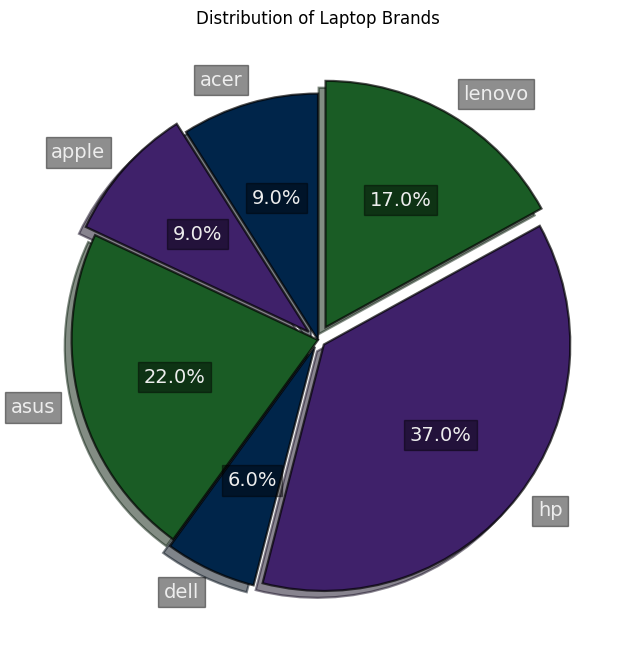

In [27]:
# Define a list of popular laptop brands to search for
laptop_brands = ['acer', 'apple', 'asus', 'dell', 'hp', 'lenovo']
# Initialise a dictionary to count occurences of each brand
laptop_brands_dict = {brand: 0 for brand in laptop_brands}
# Create a regex query string by joining the brand names with a pipe ('|') symbol
laptop_brands_query = '|'.join(laptop_brands)

# Iterate through the names of laptops in the DataFrame
for laptop_name in cleaned_df.name:
  # Search for any brand name in the laptop name using regex
  result = re.findall(rf"{laptop_brands_query}" ,laptop_name.lower())

  # Check if any brand name was found in the laptop name
  if result:
    # Increment the count for the found brand in the dictionary
    laptop_brands_dict[result[0]] += 1

# Create a figure for the pie chart with specified dimensions
plt.figure(figsize=(8, 8))

# Plot a pie chart showing the distribution of laptop brands
plt.pie(laptop_brands_dict.values(),
        labels = laptop_brands_dict.keys(),
        explode = [.0, .05, .0, .03, .03, .06],
        shadow = True,
        startangle = 90,
        autopct = '%1.1f%%',
        colors = ["#00254A", "#3f216a", "#1A5c25"],
        wedgeprops = {'edgecolor': '#000000b1', 'linewidth': 1.6},
        textprops = {'fontsize': 14, 'color': '#ededed', 'backgroundcolor': "#00000071"}
        )
# Add a title to the pie chart
plt.title('Distribution of Laptop Brands')

# Display the pie chart
plt.show()

### 3.2.2. Heat Map

#### 3.2.2.1. Data Correlation

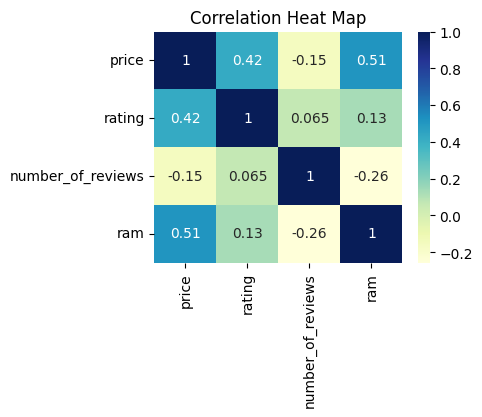

In [28]:
# Create a new figure with specified dimensions for the heat map
plt.figure(figsize=(4, 3))

# Plot a heat map to visualise correlations between selected numerical columns
sns.heatmap(cleaned_df[["price", "rating", "number_of_reviews", "ram"]].corr(),
            annot=True,
            cmap='YlGnBu')
# Add a title to the heat map
plt.title('Correlation Heat Map')

# Display the heat map
plt.show()

### 3.2.3. Scatter Plots

#### 3.2.3.1. RAM vs Price

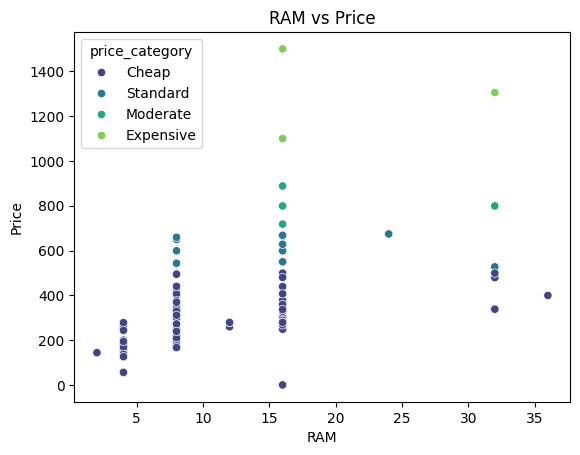

In [29]:
# Create a scatter plot to visualise the relationship between RAM and price
sns.scatterplot(data=cleaned_df,
                x="ram",
                y="price",
                hue="price_category",
                palette = "viridis"
                )
# Add a title to the scatter plot
plt.title("RAM vs Price")
# Label the x-axis as "RAM"
plt.xlabel("RAM")
# Label the y-axis as "Price"
plt.ylabel("Price")

# Display the scatter plot
plt.show()

#### 3.2.3.2. Rating vs Price

####3 3.2.3.2.1. Before Categorisation

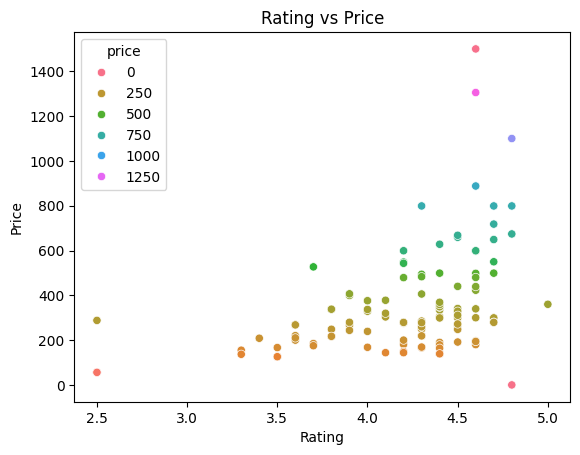

In [30]:
# Create a scatter plot to visualise the relationship between rating and price rounding
sns.scatterplot(cleaned_df, x="rating", y = "price",
                hue = "price",
                palette = "husl"
                )
# Add a title to the scatter plot
plt.title("Rating vs Price")
# Label the x-axis as "Rating"
plt.xlabel("Rating")
# Label the y-axis as "Price"
plt.ylabel("Price")

# Display the scatter plot
plt.show()

####3 3.2.3.2.2. After Categorisation

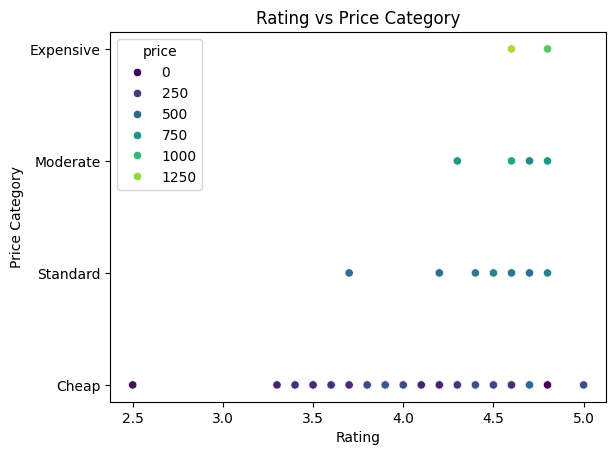

In [31]:
# Define labels for price categories
price_labels = ["Cheap", "Standard", "Moderate", "Expensive"]

# Create a copy of the cleaned DataFrame for further modifications
sns_scat_df = cleaned_df.copy()

# Convert price category labels into numerical indices for plotting
sns_scat_df["price_category"] = sns_scat_df["price_category"].apply(lambda x: price_labels.index(x)).astype("Int64")

# Create a scatter plot to visualise the relationship between rating and price category
sns.scatterplot(sns_scat_df,
                x="rating",
                y = "price_category",
                hue = "price",
                palette = "viridis"
                )
# Add a title to the scatter plot
plt.title("Rating vs Price Category")
# Label the x-axis as "Rating"
plt.xlabel("Rating")
# Label the y-axis as "Price"
plt.ylabel("Price Category")
# Set y-axis ticks to correspond to the price category labels
plt.yticks(range(4), price_labels)

# Display the scatter plot
plt.show()

### 3.2.4. Count Plots

### 3.2.4.1. Distribution of Ratings Based on RAM

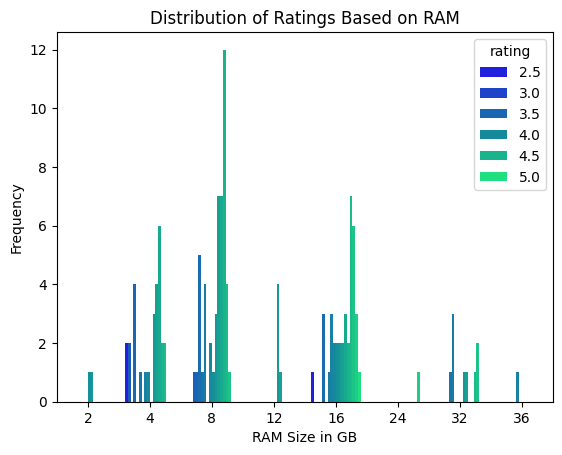

In [32]:
# Create a count plot to visualise the distribution of RAM sizes with ratings as the hue
sns.countplot(data=cleaned_df,
              x="ram",
              hue = "rating",
              palette = "winter"
              )
# Add a title to the count plot
plt.title("Distribution of Ratings Based on RAM")
# Label the x-axis as "RAM Size in GB"
plt.xlabel("RAM Size in GB")
# Label the y-axis as "Frequency"
plt.ylabel("Frequency")

# Display the count plot
plt.show()

### 3.2.4.2. Frequency of Ratings

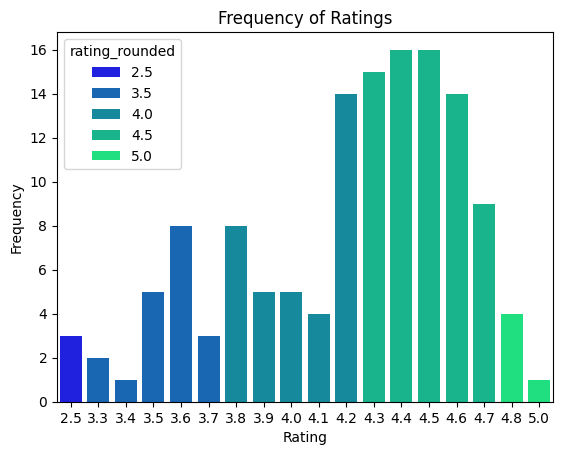

In [33]:
# Create a count plot to show the frequency of ratings with bars differentiated by rounded ratings
sns.countplot(data=cleaned_df,
              x="rating",
              hue = "rating_rounded",
              palette = "winter"
              )
# Add a title to the count plot
plt.title("Frequency of Ratings")
# Label the x-axis as "Rating"
plt.xlabel("Rating")
# Label the y-axis as "Frequency"
plt.ylabel("Frequency")

# Display the count plot
plt.show()

### 3.2.5. KDE Plot

### 3.2.5.1. Density of Ratings

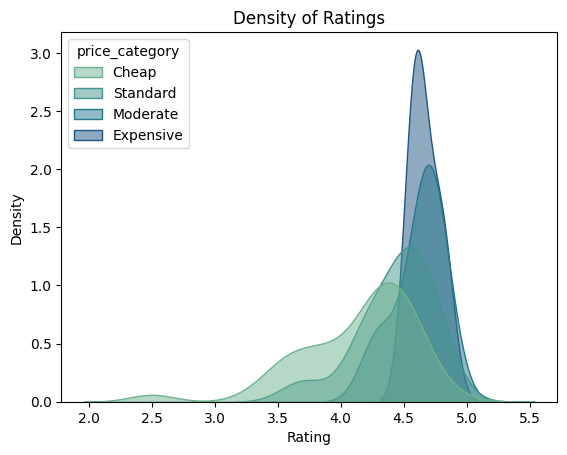

In [34]:
# Create a Kernel Density Estimation (KDE) plot to visualise the density of ratings differentiated by price categories
sns.kdeplot(data=cleaned_df,
            x="rating",
            hue="price_category",
            fill=True,
            common_norm=False,
            alpha=.5,
            palette = "crest",
            warn_singular=False
            )
# Add a title to the KDE plot
plt.title("Density of Ratings")
# Label the x-axis as "Rating"
plt.xlabel("Rating")
# Label the y-axis as "Density"
plt.ylabel("Density")

# Display the KDE plot
plt.show()

## 4. Data Loading

### 4.1. Data Export

#### 4.1.1. Save data to CSV

In [35]:
# Specify the filename
output_file = 'walmart_products.csv'

# Save the cleaned data to a CSV file
cleaned_df.to_csv(output_file, index=False)

In [36]:
# Read the saved data from CSV file
walmart_products = pd.read_csv('walmart_products.csv')

In [37]:
# Display the saved data
walmart_products

,name,price,rating,number_of_reviews,url,ram,rating_rounded,price_category
0,Acer Chromebook 315 15.6 inch Laptop Intel Pro...,139.00,4.4,5909,https://walmart.com/ip/Acer-Chromebook-315-15-...,4,4.5,Cheap
1,Restored Apple MacBook Air 13.3-inch Intel Cor...,217.00,3.8,867,https://walmart.com/ip/Restored-Apple-MacBook-...,8,4.0,Cheap
2,"Auusda 15.6"" Laptop Computer Intel N95 up to 3...",338.00,3.8,345,https://walmart.com/ip/Auusda-15-6-Laptop-Comp...,32,4.0,Cheap
3,"Dell Latitude 3500 15.6"" Laptop PC | Intel Cor...",268.00,3.6,40,https://walmart.com/ip/Restored-Dell-Latitude-...,16,3.5,Cheap
4,Apple MacBook Air 13.3 inch Laptop - Space Gra...,649.00,4.7,4895,https://walmart.com/ip/Apple-MacBook-Air-13-3-...,8,4.5,Standard
...,...,...,...,...,...,...,...,...
128,"HP Essential 255 G10 15.6"" FHD Business Laptop...",499.00,4.7,39,https://walmart.com/ip/HP-Essential-255-G10-15...,32,4.5,Cheap
129,MSI Summit 13.3 inch Touch 2-in-1 Windows Lapt...,799.00,4.8,6,https://walmart.com/ip/MSI-Summit-13-3-inch-To...,16,5.0,Moderate
130,ASUS ROG Strix G16 16 inch QHD Nebula 240Hz Ga...,0.00,4.8,45,https://walmart.com/ip/ASUS-ROG-Strix-G16-16-i...,16,5.0,Cheap
131,ASUS TUF F15 15.6 inch FHD 144Hz Gaming Laptop...,1100.00,4.8,114,https://walmart.com/ip/ASUS-TUF-F15-15-6-inch-...,16,5.0,Expensive
